In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("C:\\Users\\shekh\\Downloads\\adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

* our target column is income which give parameter that if a income is greator than 50k or less than 50k

In [7]:
# as we can observe the skewness in above distributions

In [8]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [9]:
df.replace('?', np.nan, inplace=True)

In [10]:
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [12]:
df.shape

(32561, 15)

In [13]:
df.isnull().sum()*100/len(df)

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

In [14]:
df.dropna(how='any', inplace=True)

In [15]:
df.shape

(30162, 15)

In [16]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
17344,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
19067,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
22934,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K


In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(30139, 15)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30139.0,38.441720,13.131426,17.0,28.0,37.0,47.0,90.0
fnlwgt,30139.0,189795.025980,105658.624341,13769.0,117627.5,178417.0,237604.5,1484705.0
education.num,30139.0,10.122532,2.548738,1.0,9.0,10.0,13.0,16.0
capital.gain,30139.0,1092.841202,7409.110596,0.0,0.0,0.0,0.0,99999.0
capital.loss,30139.0,88.439928,404.445239,0.0,0.0,0.0,0.0,4356.0
hours.per.week,30139.0,40.934703,11.978753,1.0,40.0,40.0,45.0,99.0


In [20]:
df['education'].unique()

array(['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc',
       '1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'],
      dtype=object)

In [21]:
df['education.num'].unique()

array([ 9,  4, 10,  6, 16, 15, 13, 14,  7, 11,  2,  3, 12,  8,  5,  1],
      dtype=int64)

* as we can see that the education and education.num conveys same information we drop the education num column


In [22]:
df.drop('education.num', axis=1, inplace=True)

In [23]:
df.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [24]:
#differentiating  the features
num_feat=[fea for fea in df.columns if df[fea].dtype!='O']
cat_feat=[fea for fea in df.columns if df[fea].dtype=='O']
print(f'numerical features are: {num_feat} \ncategorical features are:{cat_feat}')

numerical features are: ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week'] 
categorical features are:['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


In [25]:
df[num_feat].head(2)

,age,fnlwgt,capital.gain,capital.loss,hours.per.week
1,82,132870,0,4356,18
3,54,140359,0,3900,40


In [26]:
df[cat_feat].head(2)

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K


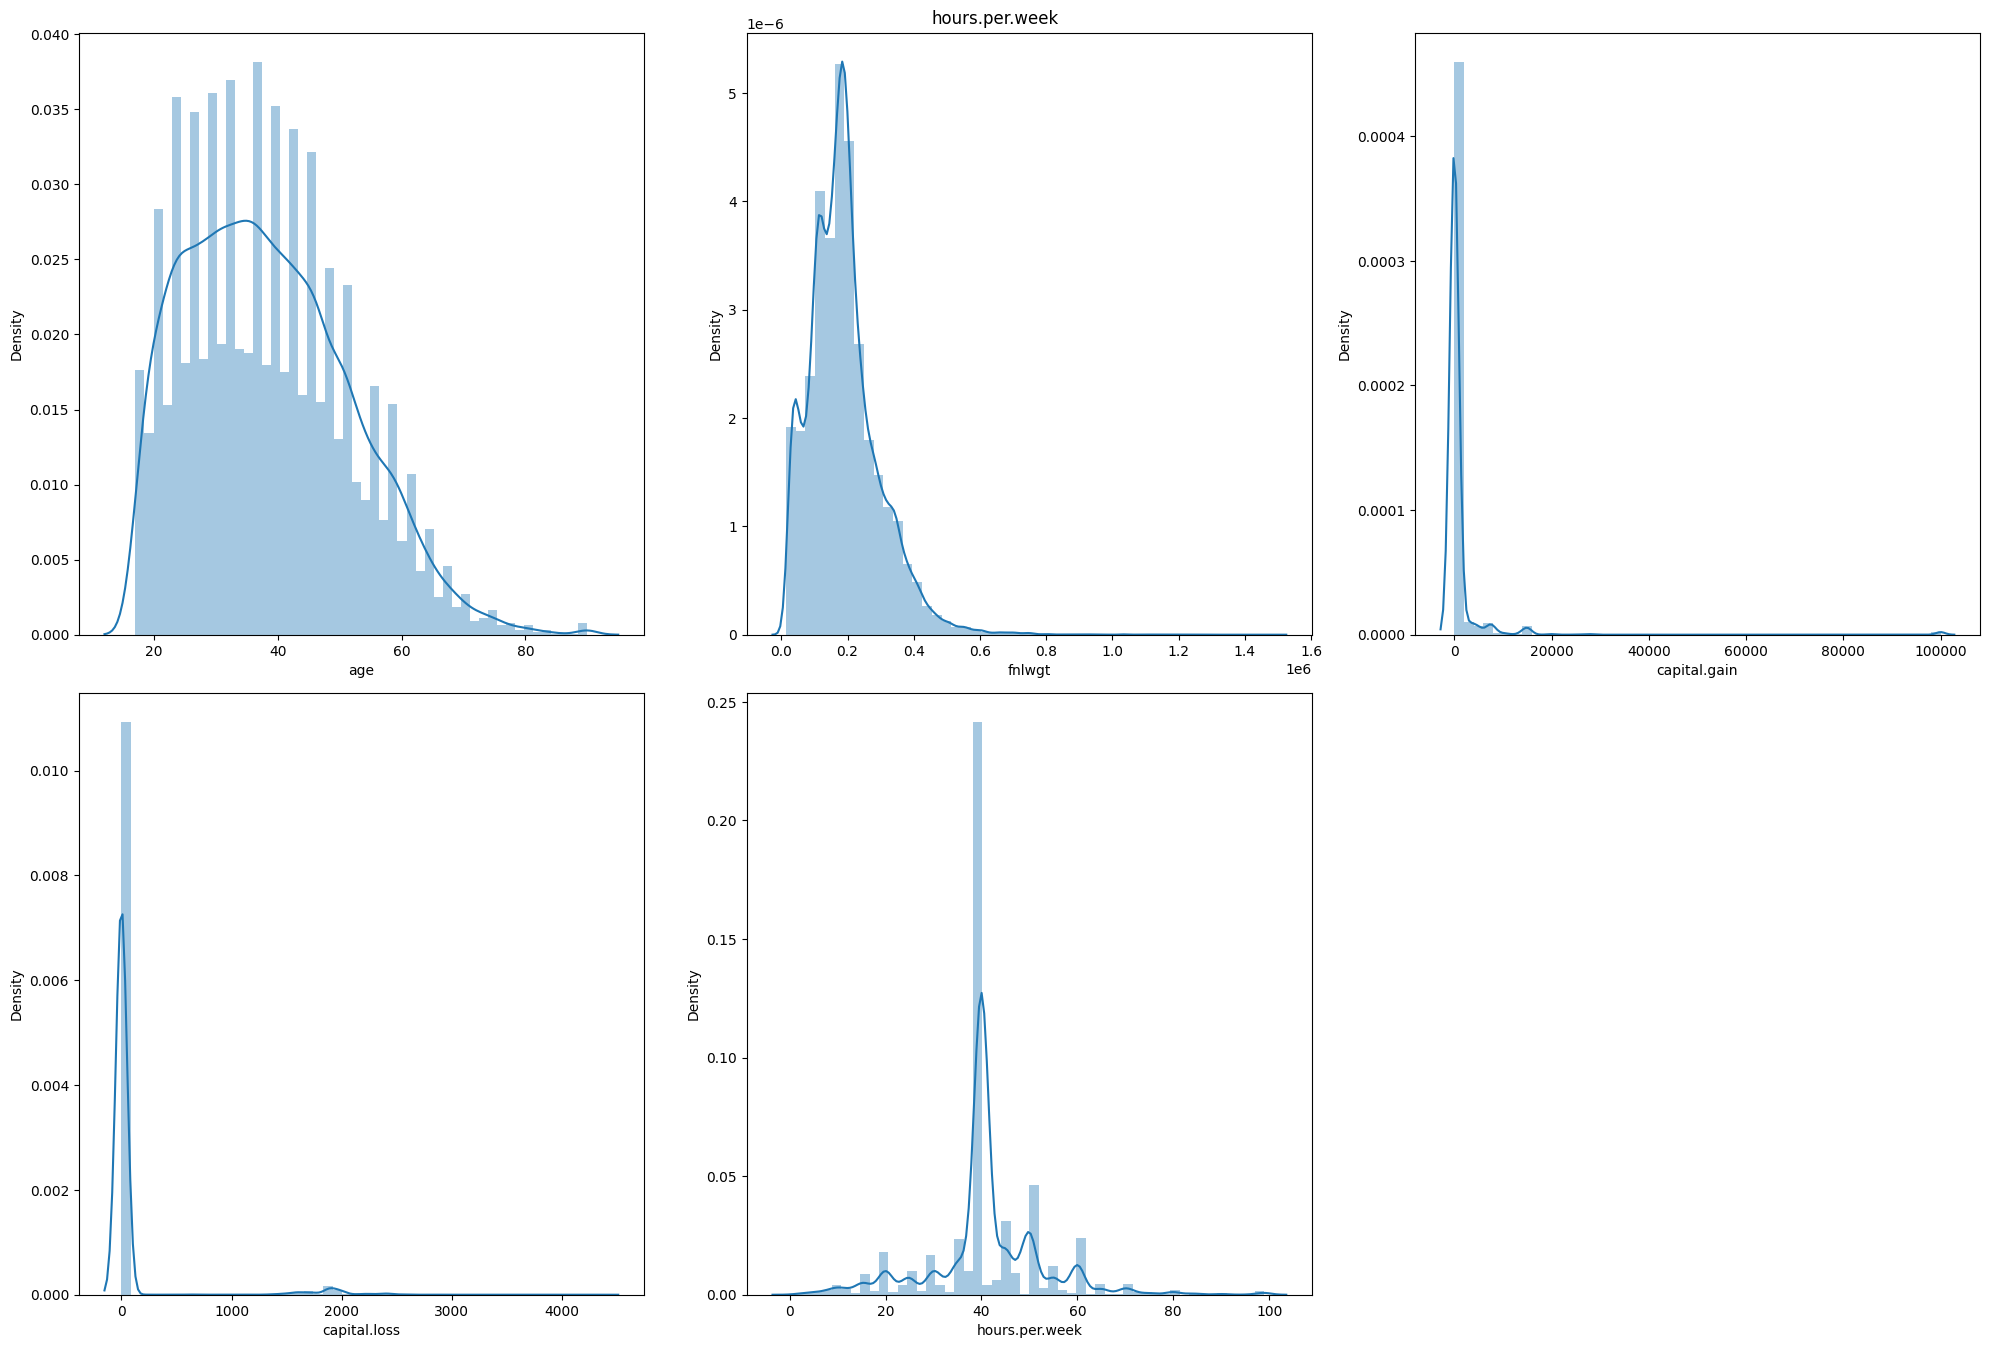

In [27]:
plt.figure(figsize=(20,20))
plt.title('Distribution of the numerical featuers')
plotno=1
for i in df[num_feat]:
    if plotno<=6:
        plt.subplot(3,3,plotno)
        sns.distplot(df[i], kde=True)
        plt.suptitle(i)
    plotno+=1
plt.tight_layout()

* we can observe from the above data :
    * age, fnlwgt, capital.gain, capital.loss are right skewed with outliers present in them

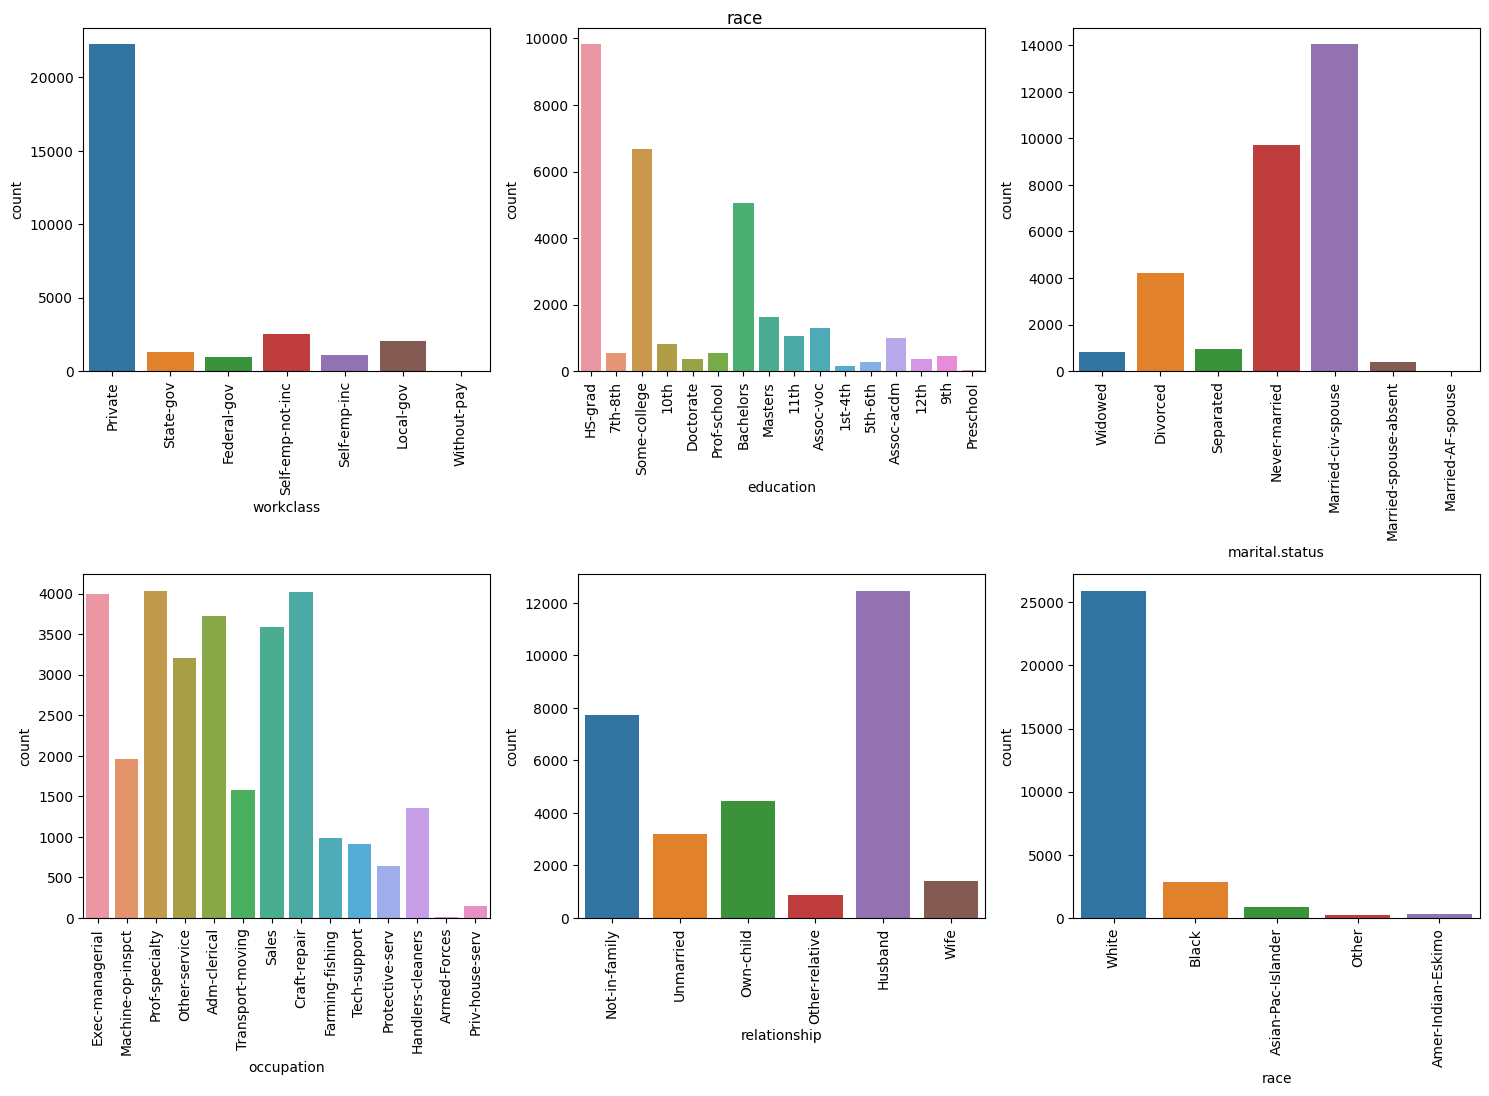

In [28]:
plt.figure(figsize=(15,15))
plt.title('Distribution of the categorical featuers')
plotno=1
for i in df[cat_feat]:
    if plotno<=6:
        plt.subplot(3,3,plotno)
        sns.countplot(df[i])
        plt.xticks(rotation=90)
        plt.suptitle(i)
    plotno+=1
plt.tight_layout()

In [27]:
#let find out that how many persons are there with both masters and bachelors degree
filter_one = df['education'] == 'Bachelors'
filter_two = df['education'] == 'Masters'

In [28]:
len(df[filter_one | filter_two])

6668

In [29]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in cat_feat:
    if chi2_contingency(pd.crosstab(df['income'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_feat, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,workclass,Reject Null Hypothesis
1,education,Reject Null Hypothesis
2,marital.status,Reject Null Hypothesis
3,occupation,Reject Null Hypothesis
4,relationship,Reject Null Hypothesis
5,race,Reject Null Hypothesis
6,sex,Reject Null Hypothesis
7,native.country,Reject Null Hypothesis
8,income,Reject Null Hypothesis


In [30]:
continues_features=[fea for fea in num_feat if len(df[fea].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']


<AxesSubplot: xlabel='income', ylabel='age'>

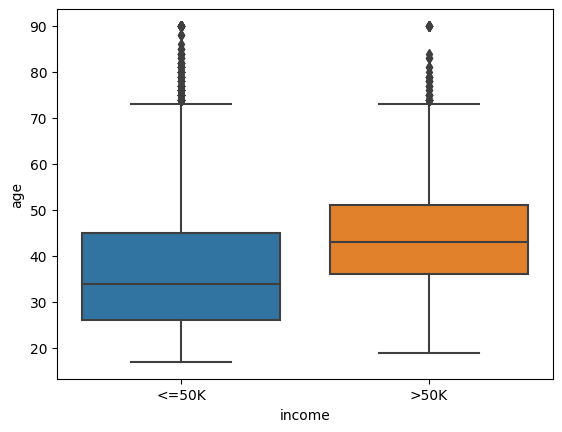

In [33]:
sns.boxplot(x='income', y='age',data=df)

* From boxplot we can understand that most people getting <=50k are younger and people getting >50k are ager. And there is overlapping between two ages too.

* converting <=50k  to 0 and >50k to 1 using encoding techniques

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
encoder=LabelEncoder()

In [31]:
df['income']=encoder.fit_transform(df['income'])

In [32]:
df.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


In [33]:
df['income'].unique()

array([0, 1])

* converted <=50k to 0 and >50k to 1 using encoding techniques

In [34]:
#which workclass gets the highest salary
df.groupby('workclass')['income'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.558659
Federal-gov         0.387063
Local-gov           0.294630
Self-emp-not-inc    0.285829
State-gov           0.268960
Private             0.218918
Without-pay         0.000000
Name: income, dtype: float64

In [35]:
#which occupation  gets the highest salary
df.groupby('occupation')['income'].mean().sort_values(ascending=False)

occupation
Exec-managerial      0.485342
Prof-specialty       0.448686
Protective-serv      0.326087
Tech-support         0.305159
Sales                0.270647
Craft-repair         0.225590
Transport-moving     0.202926
Adm-clerical         0.133907
Machine-op-inspct    0.124236
Farming-fishing      0.116515
Armed-Forces         0.111111
Handlers-cleaners    0.061527
Other-service        0.041134
Priv-house-serv      0.007092
Name: income, dtype: float64

<AxesSubplot: xlabel='occupation'>

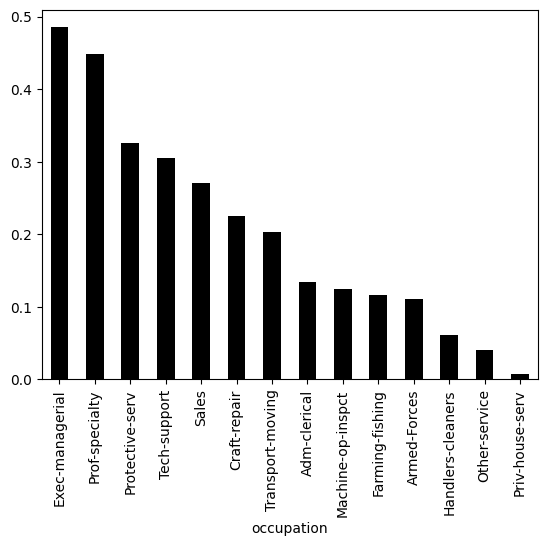

In [41]:
df.groupby('occupation')['income'].mean().sort_values(ascending=False).plot(kind='bar', color='black')

In [83]:
df.groupby('sex')['income'].mean().sort_values(ascending=False)

sex
Male      0.313955
Female    0.113783
Name: income, dtype: float64

<AxesSubplot: ylabel='income'>

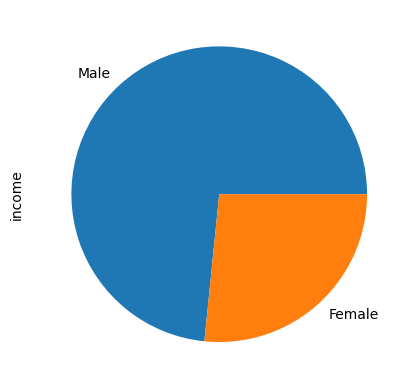

In [103]:
df.groupby('sex')['income'].mean().sort_values(ascending=False).plot(kind='pie')

In [84]:
#which marital status gets the best salary
df.groupby('marital.status')['income'].mean().sort_values(ascending=False)

marital.status
Married-AF-spouse        0.476190
Married-civ-spouse       0.455011
Divorced                 0.107312
Widowed                  0.096735
Married-spouse-absent    0.083784
Separated                0.070288
Never-married            0.048399
Name: income, dtype: float64

<AxesSubplot: xlabel='marital.status'>

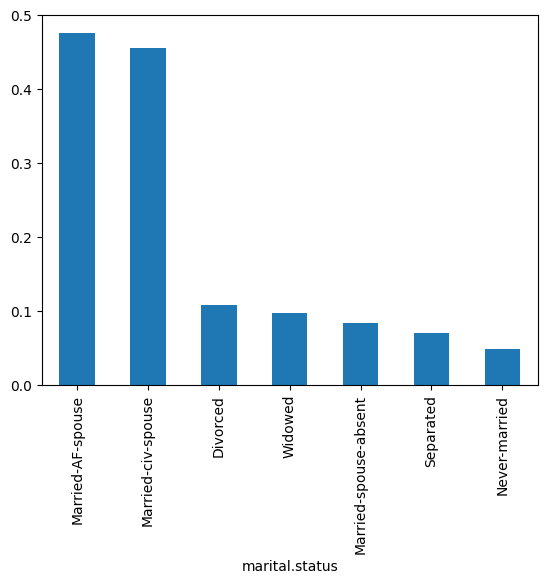

In [99]:
df.groupby('marital.status')['income'].mean().sort_values(ascending=False).plot(kind='bar')

In [102]:
#which race makes more income
df.groupby('race')['income'].mean().sort_values(ascending=False).plot

race
Asian-Pac-Islander    0.277405
White                 0.263855
Black                 0.129972
Amer-Indian-Eskimo    0.118881
Other                 0.090909
Name: income, dtype: float64

#### logistic regression 

In [41]:
scaler=StandardScaler()

In [42]:
x=df[num_feat]
y=df['income']

In [43]:
x.head()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week
1,82,132870,0,4356,18
3,54,140359,0,3900,40
4,41,264663,0,3900,40
5,34,216864,0,3770,45
6,38,150601,0,3770,40


In [44]:
x_scaled=scaler.fit_transform(x)

In [45]:
x_scaled

array([[ 3.31715708, -0.53877259, -0.14750209, 10.55181385, -1.91464694],
       [ 1.18483233, -0.4678922 , -0.14750209,  9.42432483, -0.07803133],
       [ 0.19482442,  0.70859541, -0.14750209,  9.42432483, -0.07803133],
       ...,
       [ 0.11866996, -0.33524583, -0.14750209, -0.21867335, -0.07803133],
       [ 1.48945015, -0.35856661, -0.14750209, -0.21867335, -0.07803133],
       [-1.25211023,  0.11068825, -0.14750209, -0.21867335, -1.74768188]])

In [46]:
 x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=355)

## implementing the logistic regression

In [61]:
log_reg=LogisticRegression()

In [62]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [63]:
log_pred=log_reg.predict(x_test)

In [64]:
log_pred

array([0, 0, 0, ..., 0, 0, 0])

## checking the accuracy

In [66]:
accuracy_score(y_test, log_pred)

0.7969475779694758

## implementing Support vector Classifier(SVC)

In [30]:
from sklearn.svm import SVC

In [83]:
svc=SVC()

In [84]:
svc.fit(x_train, y_train)

SVC()

In [85]:
svc_predict=svc.predict(x_test)

In [86]:
svc_predict

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
accuracy_score(y_test, svc_predict)

0.8065029860650299

In [88]:
cm = confusion_matrix(y_test, svc_predict)

In [89]:
print(f'confusion matrix:\n {cm}')

confusion matrix:
 [[5595   91]
 [1367  482]]


### AUC or RUC curve

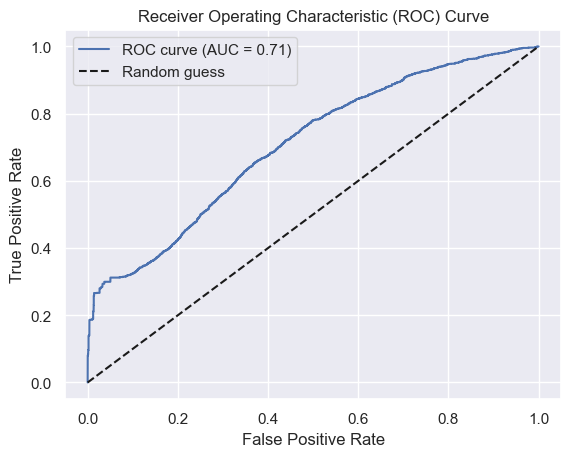

In [90]:
# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### gridsearch cv implementation

In [28]:
from sklearn.model_selection import GridSearchCV

In [31]:
svc_model= SVC(random_state=42)

In [32]:
# define the hyperparameters to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10]
}


In [33]:
# create a grid search object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5)

In [34]:
# fit the grid search object to the data
grid_search.fit(x, y)

ValueError: could not convert string to float: 'Private'